In [127]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [129]:
data = pd.read_csv("List of Countries by Sugarcane Production.csv")

In [131]:
data.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [133]:
data.shape

(103, 7)

##Data cleaning

In [136]:
data["Production (Tons)"]= data["Production (Tons)"].str.replace(".","")
data["Production per Person (Kg)"] = data["Production per Person (Kg)"].str.replace(".","").str.replace(",",".")
data["Acreage (Hectare)"] =data["Acreage (Hectare)"].str.replace(".","")
data["Yield (Kg / Hectare)"] = data["Yield (Kg / Hectare)"].str.replace(".","").str.replace(",",".")

In [138]:
data.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


#Removing space between column name

In [141]:
data.rename(columns= {"Production (Tons)":"Production(Tons)"},inplace= True)
data.rename(columns={"Production per Person (Kg)":"Production_per_Person(Kg)"},inplace= True)
data.rename(columns={"Acreage (Hectare)":"Acreage(Hectare)"},inplace=True)
data.rename(columns={"Yield (Kg / Hectare)":"Yield(Kg/Hectare)"},inplace=True)

In [143]:
data.head()

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [145]:
data.isna().sum()

Unnamed: 0                   0
Country                      0
Continent                    0
Production(Tons)             0
Production_per_Person(Kg)    0
Acreage(Hectare)             1
Yield(Kg/Hectare)            1
dtype: int64

In [147]:
data[data["Acreage(Hectare)"].isnull()]

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
99,99,Djibouti,Africa,53,51,NaN,NaN


In [149]:
data = data.dropna().reset_index()
data.head()

,index,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [151]:
data.drop(["index","Unnamed: 0"],axis = 1,inplace=True)
data.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [153]:
data.dtypes

Country                      object
Continent                    object
Production(Tons)             object
Production_per_Person(Kg)    object
Acreage(Hectare)             object
Yield(Kg/Hectare)            object
dtype: object

#Convert object to float for further processing or work 

In [156]:
data["Production(Tons)"] = data["Production(Tons)"].astype(float)
data["Production_per_Person(Kg)"] = data["Production_per_Person(Kg)"].astype(float)
data["Acreage(Hectare)"] = data["Acreage(Hectare)"].astype(float)
data["Yield(Kg/Hectare)"] = data["Yield(Kg/Hectare)"].astype(float)

data.dtypes

Country                       object
Continent                     object
Production(Tons)             float64
Production_per_Person(Kg)    float64
Acreage(Hectare)             float64
Yield(Kg/Hectare)            float64
dtype: object

In [158]:
data.nunique()

Country                      102
Continent                      6
Production(Tons)             102
Production_per_Person(Kg)    101
Acreage(Hectare)             101
Yield(Kg/Hectare)            102
dtype: int64

#Univarite Analysis

In [161]:
data.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


#How many country produce sugarcase from each continent

In [164]:
data["Continent"].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

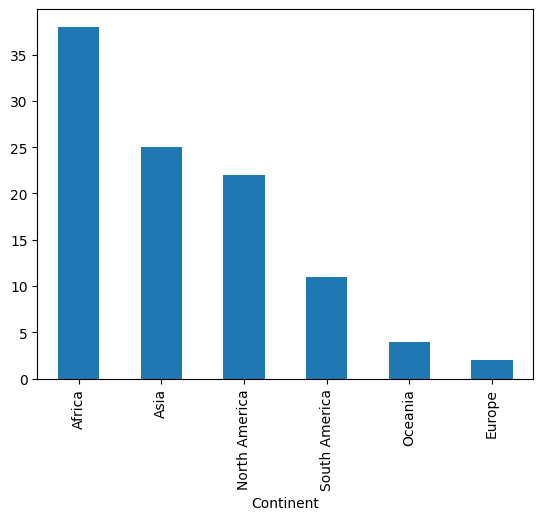

In [168]:
data["Continent"].value_counts().plot(kind="bar")

#Distribution of column

C:\Users\umapj\AppData\Local\Temp\ipykernel_10092\2880612471.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Production(Tons)"])
C:\Users\umapj\AppData\Local\Temp\ipykernel_10092\2880612471.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Production_per_Person(Kg)"])
C:\Users\

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Density'>

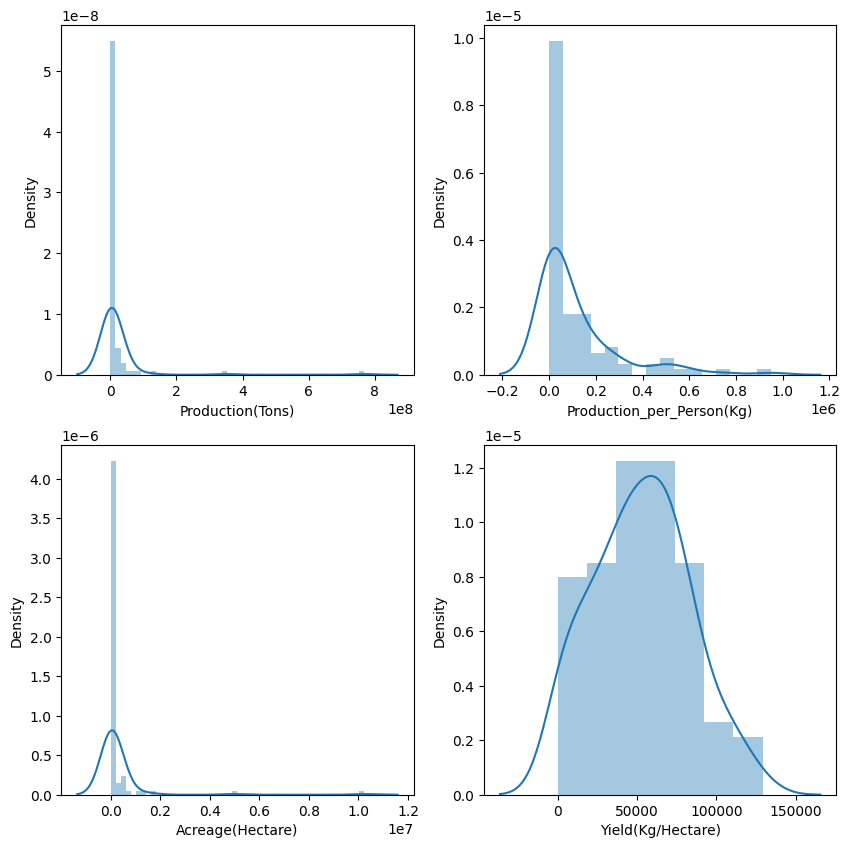

In [171]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.distplot(data["Production(Tons)"])
plt.subplot(2,2,2)
sns.distplot(data["Production_per_Person(Kg)"])
plt.subplot(2,2,3)
sns.distplot(data["Acreage(Hectare)"])
plt.subplot(2,2,4)
sns.distplot(data["Yield(Kg/Hectare)"])
# plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

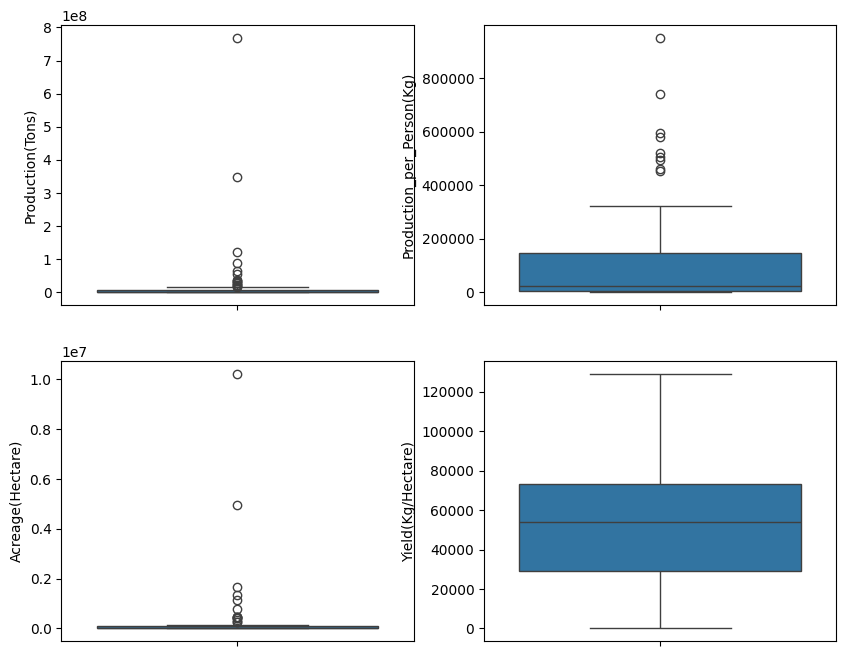

In [172]:
plt.figure(figsize =(10,8))
plt.subplot(2,2,1)
sns.boxplot(data["Production(Tons)"])
plt.subplot(2,2,2)
sns.boxplot(data["Production_per_Person(Kg)"])
plt.subplot(2,2,3)
sns.boxplot(data["Acreage(Hectare)"])
plt.subplot(2,2,4)
sns.boxplot(data["Yield(Kg/Hectare)"])
plt.show

<Axes: ylabel='Production(Tons)'>

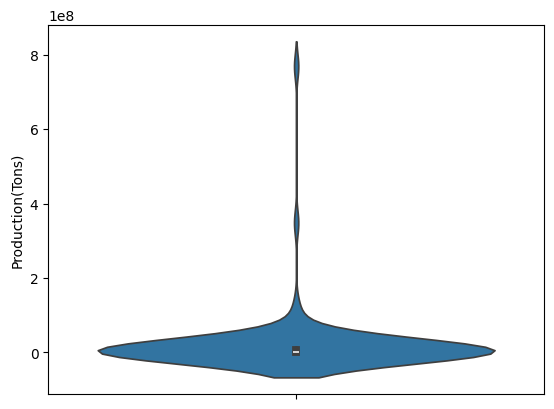

In [175]:
sns.violinplot(data["Production(Tons)"])

In [177]:
data.describe()

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
count,1.020000e+02,102.000000,1.020000e+02,102.000000
mean,1.850372e+07,112952.435755,2.498981e+05,52628.078431
std,8.419149e+07,176651.341929,1.137003e+06,30504.676683
min,1.000000e+00,0.000000,0.000000e+00,10.000000
25%,6.251875e+04,3671.910000,1.104000e+03,29072.025000
50%,1.440044e+06,25572.500000,1.655800e+04,54108.950000
75%,6.426824e+06,146384.750000,8.047400e+04,73282.700000
max,7.686784e+08,951087.000000,1.022620e+07,129049.300000


In [180]:
data.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


In [182]:
New_data = data[["Country","Production(Tons)"]].set_index("Country")


In [184]:
New_data

,Production(Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0
...,...
Spain,394.0
Lebanon,97.0
Singapore,50.0


In [186]:
New_data["Production(Tons)_percent"] = New_data["Production(Tons)"]*100/New_data["Production(Tons)"].sum()


In [188]:
New_data

,Production(Tons),Production(Tons)_percent
Country,,
Brazil,768678382.0,4.072729e+01
India,348448000.0,1.846200e+01
China,123059739.0,6.520138e+00
Thailand,87468496.0,4.634389e+00
Pakistan,65450704.0,3.467809e+00
...,...,...
Spain,394.0,2.087551e-05
Lebanon,97.0,5.139401e-06
Singapore,50.0,2.649176e-06


<Axes: ylabel='Production(Tons)_percent'>

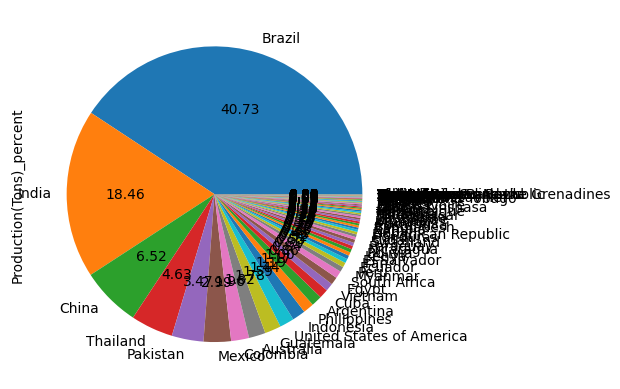

In [190]:
New_data["Production(Tons)_percent"].plot(kind = "pie", autopct = "%.2f")

<Axes: xlabel='Country'>

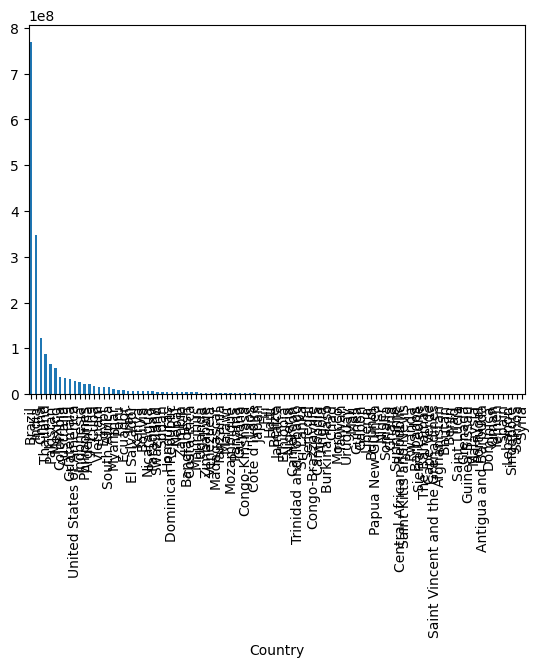

In [191]:
New_data["Production(Tons)"].plot(kind="bar")

<Axes: xlabel='Country'>

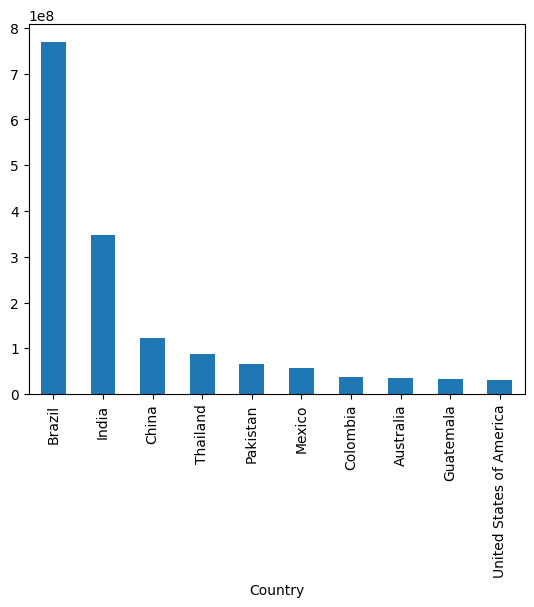

In [193]:
New_data["Production(Tons)"].head(10).plot(kind="bar")

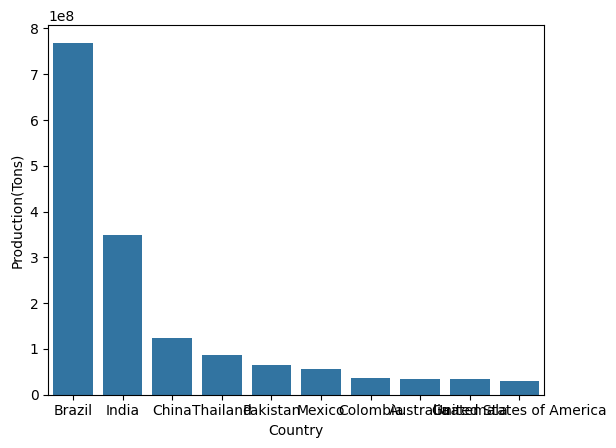

In [196]:
ax = sns.barplot(data =data.head(10),x="Country",y="Production(Tons)")

##PLOTING BAR GHRAPH USING SEABORN LIBRARY

C:\Users\umapj\AppData\Local\Temp\ipykernel_10092\268269712.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation =90)


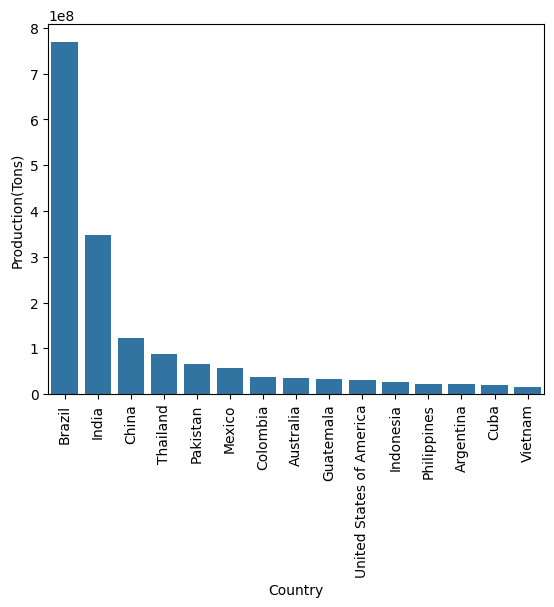

In [199]:
ax = sns.barplot(data = data.head(15),  x= "Country", y = "Production(Tons)")
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
plt.show()

In [201]:
data.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


#Which country has the highest Land

C:\Users\umapj\AppData\Local\Temp\ipykernel_10092\970892102.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


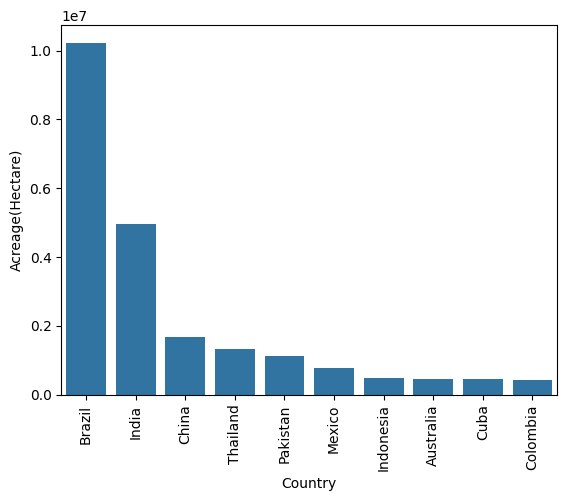

In [204]:
data_acr = data.sort_values("Acreage(Hectare)",ascending = False)           #take one agrreate 
ax = sns.barplot(data=data_acr.head(10) , x = "Country" , y = "Acreage(Hectare)")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

#Which country has the highest yeild per hector

C:\Users\umapj\AppData\Local\Temp\ipykernel_10092\2653890682.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


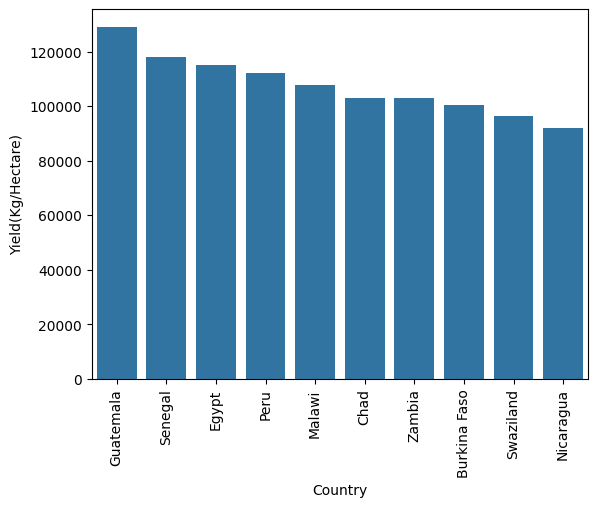

In [207]:
data_yeild = data.sort_values("Yield(Kg/Hectare)",ascending = False)           #take one agrreate 
ax = sns.barplot(data=data_yeild.head(10) , x = "Country" , y = "Yield(Kg/Hectare)")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

#Which country has highest production per person kg

C:\Users\umapj\AppData\Local\Temp\ipykernel_10092\3994810173.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


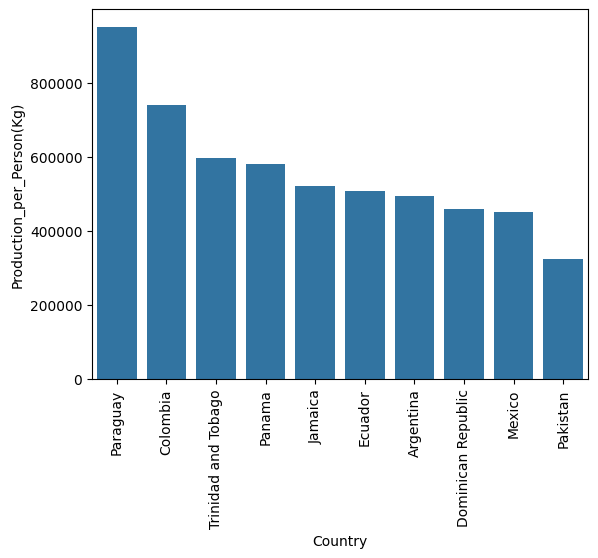

In [210]:
data_pro = data.sort_values("Production_per_Person(Kg)",ascending = False)           #take one agrreate 
ax = sns.barplot(data=data_pro.head(10) , x = "Country" , y = "Production_per_Person(Kg)")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

#Correlation

In [213]:
data.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


In [215]:
data.dtypes

Country                       object
Continent                     object
Production(Tons)             float64
Production_per_Person(Kg)    float64
Acreage(Hectare)             float64
Yield(Kg/Hectare)            float64
dtype: object

#Correlation

In [218]:
data['Country'] = data['Country'].astype('category').cat.codes.astype(float)

In [220]:
numeric_data = data.select_dtypes(include=[np.number])

In [222]:
numeric_data

,Country,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,11.0,768678382.0,3668.531,10226205.0,75167.5
1,42.0,348448000.0,260721.000,4950000.0,70393.5
2,19.0,123059739.0,88287.000,1675215.0,73459.1
3,91.0,87468496.0,1264.303,1336575.0,65442.2
4,66.0,65450704.0,324219.000,1130820.0,57879.0
...,...,...,...,...,...
97,83.0,394.0,8.000,9.0,43596.5
98,50.0,97.0,16.000,3.0,28386.4
99,80.0,50.0,9.000,2.0,25.0
100,77.0,12.0,6.000,1.0,11949.8


In [224]:
New_data.corr()

,Production(Tons),Production(Tons)_percent
Production(Tons),1.0,1.0
Production(Tons)_percent,1.0,1.0


In [228]:
data['Continent'] = data['Continent'].astype('category').cat.codes.astype(float)


<Axes: >

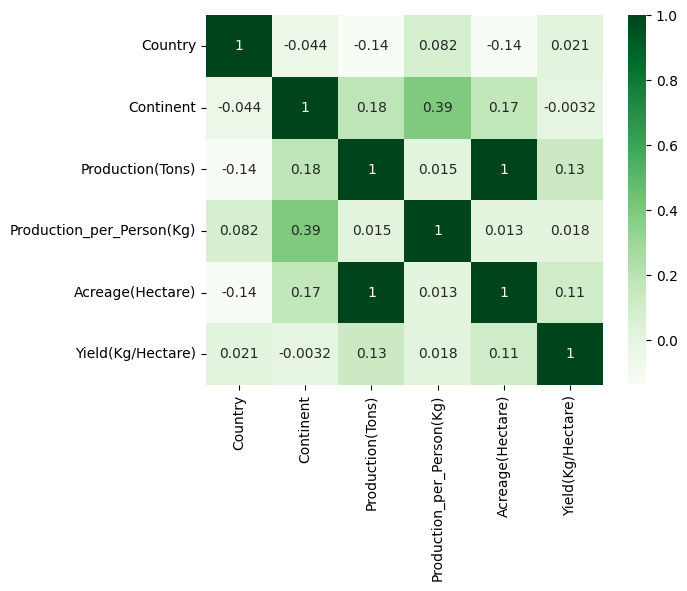

In [230]:
sns.heatmap(data.corr() , annot=True,cmap="Greens")

#Do countries with highest land produce more sugarcane?

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

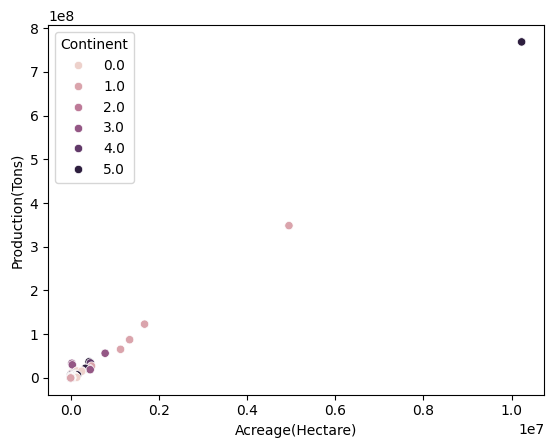

In [233]:
sns.scatterplot(data= data , x = "Acreage(Hectare)",y = "Production(Tons)", hue = "Continent" )


#Do countries which yield more sugarcane per hectare produces more sugarcane in total?

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Production(Tons)'>

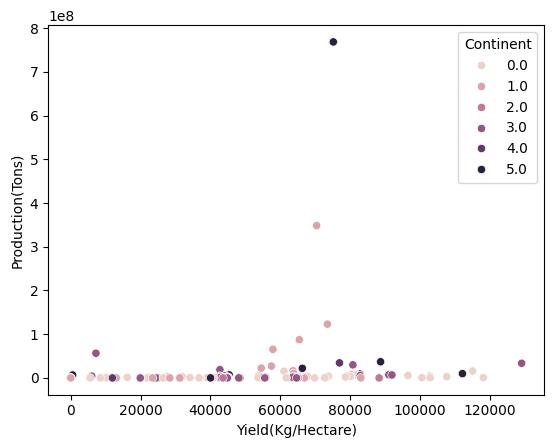

In [236]:
sns.scatterplot(data = data, x = "Yield(Kg/Hectare)" , y = "Production(Tons)", hue = "Continent")

In [238]:
data.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,11.0,5.0,768678382.0,3668.531,10226205.0,75167.5
1,42.0,1.0,348448000.0,260721.000,4950000.0,70393.5
2,19.0,1.0,123059739.0,88287.000,1675215.0,73459.1
3,91.0,1.0,87468496.0,1264.303,1336575.0,65442.2
4,66.0,1.0,65450704.0,324219.000,1130820.0,57879.0


#Analysis for Continent

In [241]:
df_continent = data.groupby("Continent").sum()

In [243]:
df_continent["number_of_countries"] = data.groupby("Continent").count()["Country"]


In [245]:
df_continent


,Country,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare),number_of_countries
Continent,,,,,,
0.0,1879.0,89681472.0,2332636.293,1439089.0,2142107.5,38
1.0,1373.0,721930425.0,1857769.303,10608319.0,1171871.4,25
2.0,155.0,5823.0,536.000,71.0,131870.9,2
3.0,1034.0,173995947.0,3796081.508,1581983.0,1082602.4,22
4.0,181.0,36177574.0,28593.605,490909.0,162419.1,4
5.0,529.0,865588126.0,3505531.738,11369236.0,677192.7,11


#Which continent produces maximum sugarcane?

<Axes: xlabel='Continent'>

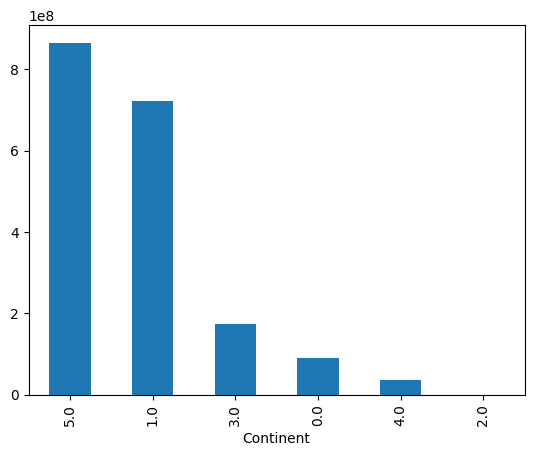

In [248]:
df_continent["Production(Tons)"].sort_values(ascending =  False).plot(kind = "bar")

#Do number of countries in a Continent effects production of sugarcane?

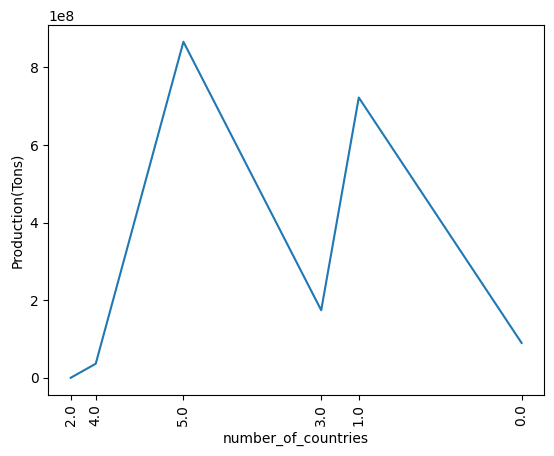

In [251]:
continent_names = df_continent.index.to_list()
sns.lineplot(data = df_continent,x = "number_of_countries", y= "Production(Tons)" )
plt.xticks(df_continent["number_of_countries"], continent_names, rotation =90)
plt.show()

#Do continent with highest land produces more sugarcane?

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

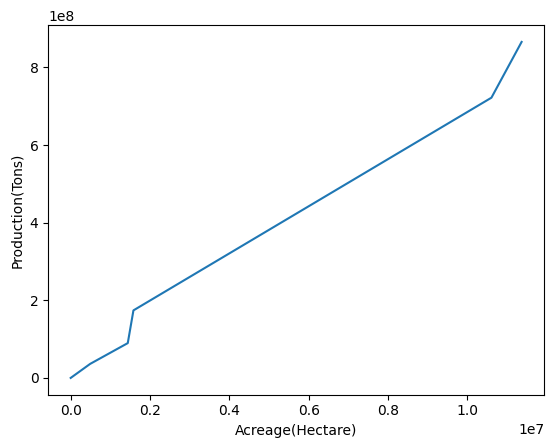

In [255]:
sns.lineplot(data = df_continent,x = "Acreage(Hectare)", y= "Production(Tons)" )

#Production distribution by continent

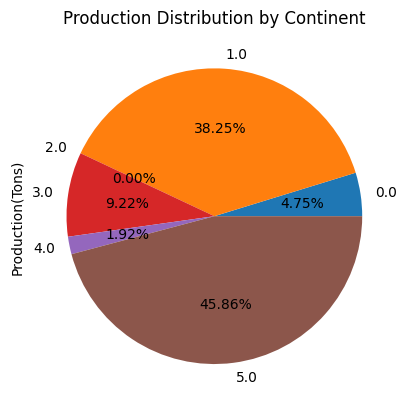

In [259]:
df_continent["Production(Tons)"].plot(kind = "pie", autopct = "%.2f%%")
plt.title('Production Distribution by Continent')
plt.show()

#Correlation for continent

In [263]:
data.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,11.0,5.0,768678382.0,3668.531,10226205.0,75167.5
1,42.0,1.0,348448000.0,260721.000,4950000.0,70393.5
2,19.0,1.0,123059739.0,88287.000,1675215.0,73459.1
3,91.0,1.0,87468496.0,1264.303,1336575.0,65442.2
4,66.0,1.0,65450704.0,324219.000,1130820.0,57879.0


In [265]:
numeric_df = df_continent.select_dtypes(include=[np.number])

In [267]:
df_continent.corr()

,Country,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare),number_of_countries
Country,1.000000,0.140166,0.497393,0.171555,0.979102,0.995141
Production(Tons),0.140166,1.000000,0.522211,0.994897,0.091201,0.109244
Production_per_Person(Kg),0.497393,0.522211,1.000000,0.463215,0.542961,0.540086
Acreage(Hectare),0.171555,0.994897,0.463215,1.000000,0.111166,0.132817
Yield(Kg/Hectare),0.979102,0.091201,0.542961,0.111166,1.000000,0.989712
number_of_countries,0.995141,0.109244,0.540086,0.132817,0.989712,1.000000
